# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [1]:
# Importa las librerias <3 
import pandas as pd

In [13]:
# Define una función para extraer los datos
# DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

# Complemento con la dirección específica de la base de datos que queremos
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/Capitulo_3/"
MEDICAMENTOS = "drug200.csv"

# Extrae los datos
df = extraer_datos(DOWNLOAD_ROOT, MEDICAMENTOS)

In [14]:
# Visualiza el DataFrame
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [15]:
# Obten información de los datos.
print("\nInformación del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


## <span style="color:green">2. Análisis de cada Variable</span>

Max Age: 74
Min Age: 15


<Figure size 900x500 with 0 Axes>

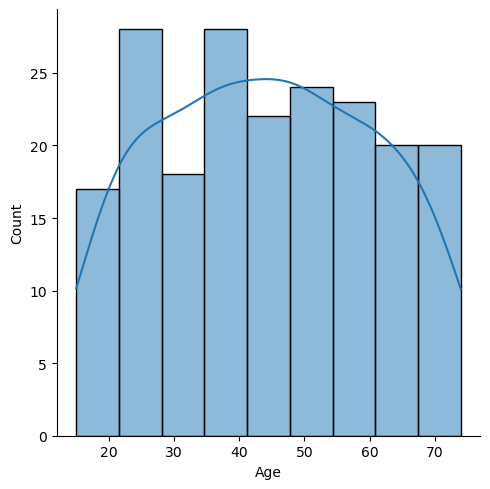

In [16]:
#Importa seaborn para tener gráficos más chidos 
import seaborn as sns
import matplotlib.pyplot as plt

#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())
plt.figure(figsize=(9, 5)) 

#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age, kde=True)
plt.show()


In [17]:
# Género: cuenta cuántos hombres y mujeres hay
print(df.Sex.value_counts())

Sex
M    104
F     96
Name: count, dtype: int64


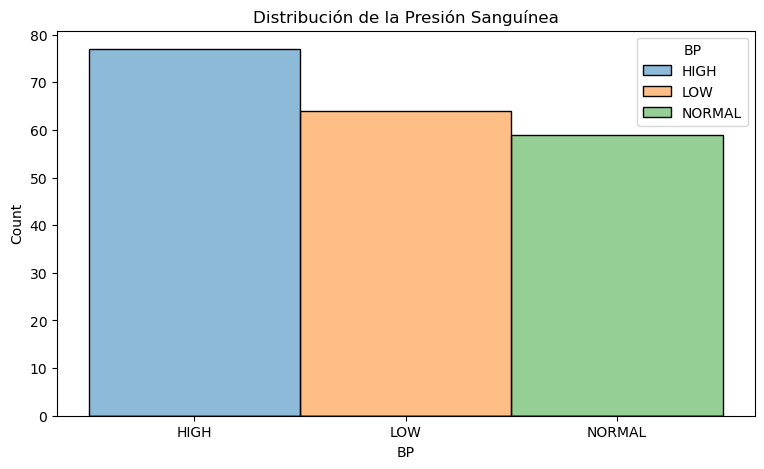

In [18]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize=(9, 5))

# Creamos un histplot con seaborn
sns.histplot(data=df, x="BP", hue="BP")

# Mostramos la grafica
plt.title("Distribución de la Presión Sanguínea")
plt.show()

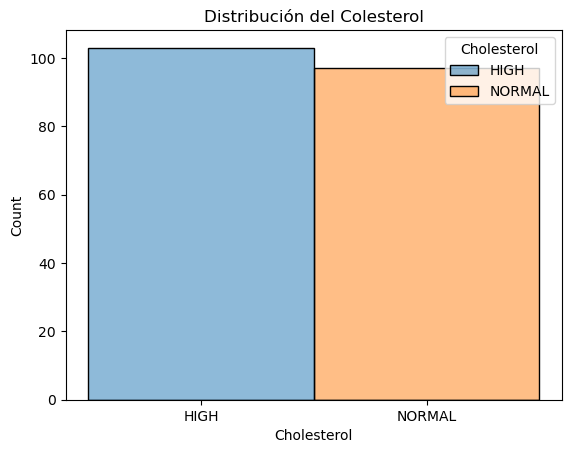

In [19]:
# Crea una gráfica de barras para Colesterol
# Creamos el histplot para la variable Cholesterol
sns.histplot(data=df, x="Cholesterol", hue="Cholesterol")

# Agrega título y muestra la gráfica
plt.title("Distribución del Colesterol")
plt.show()

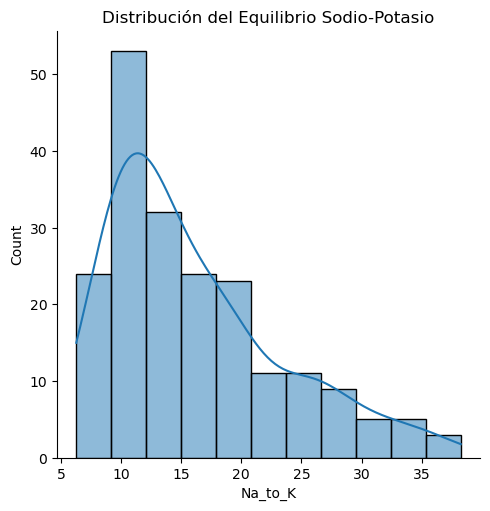

In [20]:
# Crea un displot para Sodio Potasio

# Creamos el displot de Na_to_K con kde
sns.displot(df.Na_to_K, kde=True)

# Mostramos la grafica
plt.title("Distribución del Equilibrio Sodio-Potasio")
plt.show()

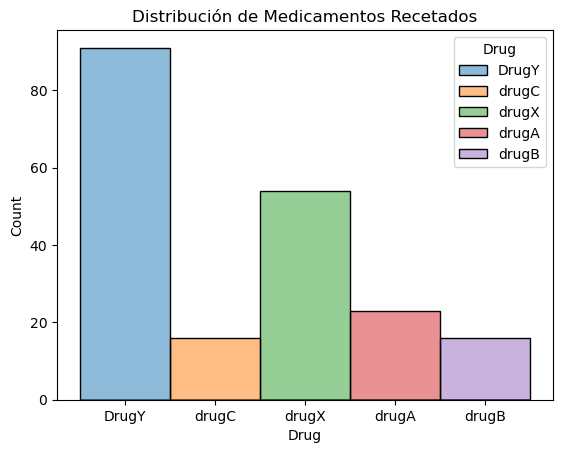


Cantidad de cada medicamento:
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [21]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊

# Creamos el histplot para la variable Drug
sns.histplot(data=df, x="Drug", hue="Drug")

# Agrega un título y muestra la gráfica
plt.title("Distribución de Medicamentos Recetados")
plt.show()

#Cuenta los medicamentos
print("\nCantidad de cada medicamento:")
print(df.Drug.value_counts())

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


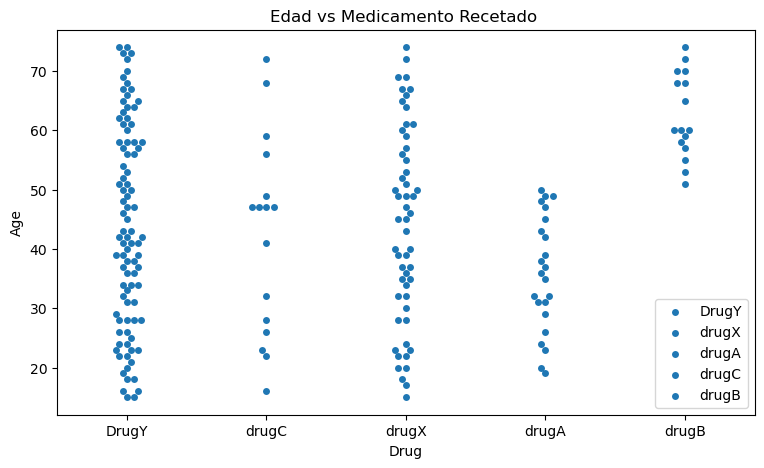

In [23]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊

plt.figure(figsize=(9, 5))

# Creamos el swarmplot
sns.swarmplot(x="Drug", y="Age", data=df)
plt.legend(df.Drug.value_counts().index)
plt.title("Edad vs Medicamento Recetado ")

plt.show()

    Drug Sex  Count
0  DrugY   F     47
1  DrugY   M     44
2  drugA   F      9
3  drugA   M     14
4  drugB   F      6
5  drugB   M     10
6  drugC   F      7
7  drugC   M      9
8  drugX   F     27
9  drugX   M     27


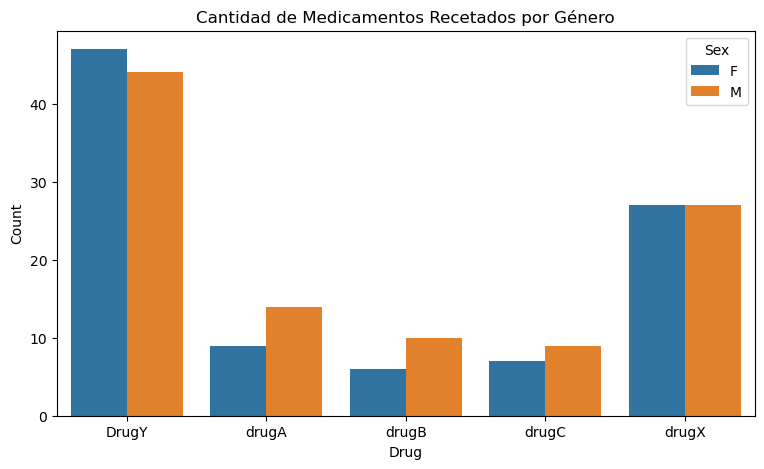

In [24]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas

# Agrupamos por Drug y Sex 
df_Sex_Drug = df.groupby(["Drug", "Sex"]).size().reset_index(name="Count")
print(df_Sex_Drug)

#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9, 5))
sns.barplot(data=df_Sex_Drug, x="Drug", y="Count", hue="Sex")

plt.title("Cantidad de Medicamentos Recetados por Género")
plt.show()

    Drug      BP  Count
0  DrugY    HIGH     38
1  DrugY     LOW     30
2  DrugY  NORMAL     23
3  drugA    HIGH     23
4  drugB    HIGH     16
5  drugC     LOW     16
6  drugX     LOW     18
7  drugX  NORMAL     36


c:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


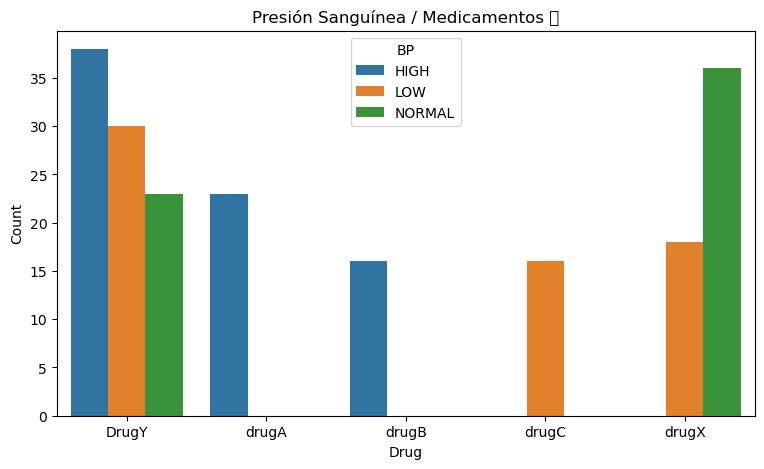

In [13]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊

# Agrupa por Drug y BP y cuenta las incidencias
df_BP_Drug = df.groupby(["Drug", "BP"]).size().reset_index(name="Count")
print(df_BP_Drug)

#gráfica de barras
plt.figure(figsize=(9, 5))
sns.barplot(x="Drug", y="Count", hue="BP", data=df_BP_Drug)

plt.title("Presión Sanguínea / Medicamentos 💊")
plt.show()

    Drug Cholesterol  Count
0  DrugY        HIGH     47
1  DrugY      NORMAL     44
2  drugA        HIGH     12
3  drugA      NORMAL     11
4  drugB        HIGH      8
5  drugB      NORMAL      8
6  drugC        HIGH     16
7  drugX        HIGH     20
8  drugX      NORMAL     34


c:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


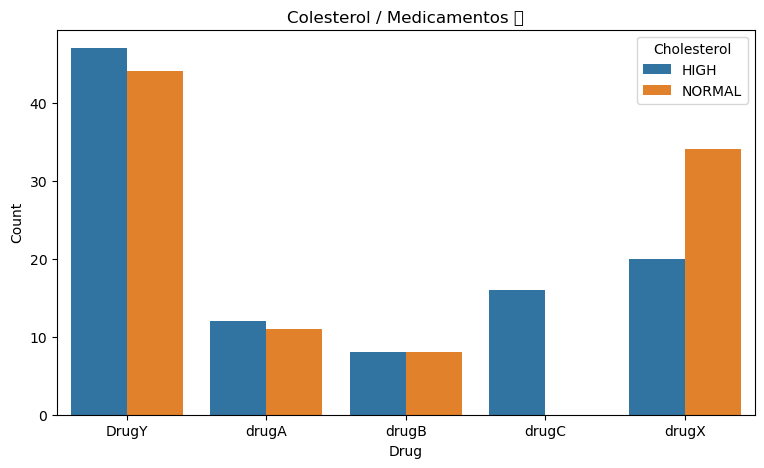

In [26]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊

# Agrupa por Drug y Cholesterol y cuenta las incidencias
df_CH_Drug = df.groupby(["Drug", "Cholesterol"]).size().reset_index(name="Count")

# Muestra el DataFrame generado (opcional, para revisar)
print(df_CH_Drug)

# Crea la gráfica de barras
plt.figure(figsize=(9, 5))
sns.barplot(x="Drug", y="Count", hue="Cholesterol", data=df_CH_Drug)

# Agrega título
plt.title("Colesterol / Medicamentos 💊")

# Muestra la gráfica
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_16764\3137307437.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Drug", y="Na_to_K", data=df, palette="Set2")
c:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


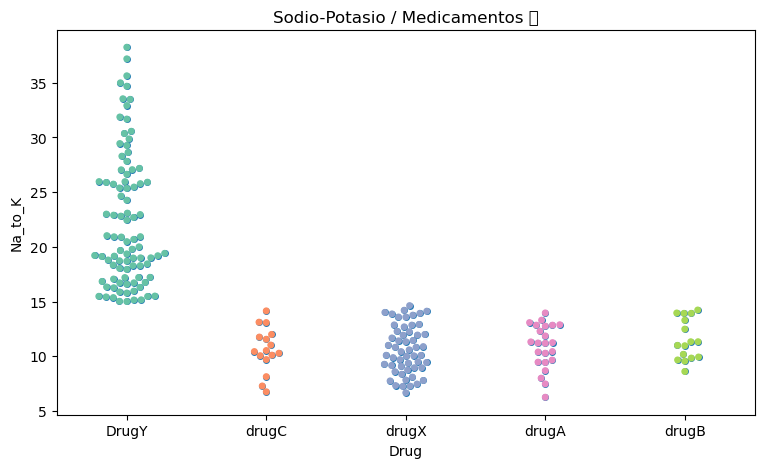

In [29]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da

# Crea la figura con el tamaño especificado
plt.figure(figsize=(9, 5))

# Crea el swarmplot: x = medicamento, y = nivel de sodio-potasio
sns.swarmplot(x="Drug", y="Na_to_K", data=df)
sns.swarmplot(x="Drug", y="Na_to_K", data=df, palette="Set2")


# Agrega título
plt.title("Sodio-Potasio / Medicamentos 💊")

# Muestra la gráfica
plt.show()

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [ ]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Definir función para codificar variables categóricas a numéricas
def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

# Lista de variables categóricas a transformar
variables = ["Sex", "BP", "Cholesterol", "Drug"]

# Aplicar la función a cada variable categórica
for var in variables:
    label_encoder(var)

# Visualizar las primeras filas para confirmar transformación
print(df.head())

# Separar los predictores (X) de la variable objetivo (y)
x = df.drop(["Drug"], axis=1)
y = df["Drug"]

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True
)

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3   28    0   2            0    7.798     4
4   61    0   1            0   18.043     0
Tamaño conjunto entrenamiento: (160, 5)
Tamaño conjunto prueba: (40, 5)


In [31]:
# Crear set de entrenamiento y set de prueba
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
x = df.drop(["Drug"], axis=1)
y = df["Drug"]

# Dividir los datos: 80% entrenamiento, 20% prueba
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True
)

# Mostrar las dimensiones de los conjuntos resultantes
print("Tamaño de x_train:", x_train.shape)
print("Tamaño de x_test:", x_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de x_train: (160, 5)
Tamaño de x_test: (40, 5)
Tamaño de y_train: (160,)
Tamaño de y_test: (40,)


El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [38]:
## Crear modelo para medicamento

# Suponiendo que el medicamento Y está codificado como 3
medicamento_objetivo = 3

# Crear etiquetas binarias para entrenamiento y prueba
y_train_c = (y_train == 0)
y_test_c = (y_test == 0)

# Revisar distribución de clases binarias
print(y_train_c.value_counts())
print(y_test_c.value_counts())


Drug
False    84
True     76
Name: count, dtype: int64
Drug
False    25
True     15
Name: count, dtype: int64


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [45]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(x_train, y_train_c)

nuevo_ejemplo = pd.DataFrame([[47, 1, 1, 0, 8]], columns=x_train.columns)

prediccion = sgd.predict(nuevo_ejemplo)

print("Predicción para el nuevo ejemplo:", prediccion[0])  # True = medicamento Y, False = otro medicamento





Predicción para el nuevo ejemplo: False


In [42]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
import pandas as pd

nuevo_ejemplo = pd.DataFrame([[47, 1, 1, 0, 8]], columns=x_train.columns)

prediccion = sgd.predict(nuevo_ejemplo)

print("Predicción para el nuevo ejemplo:", prediccion[0])


Predicción para el nuevo ejemplo: False


👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [48]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 3 folds para evaluar precisión (accuracy)
scores = cross_val_score(sgd, x_train, y_train_c, cv=3, scoring='accuracy')

# Mostrar los resultados de cada fold y el promedio
print("array", scores)
print(scores.mean())

array [0.72222222 0.47169811 0.62264151]
0.6055206149545772


 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [50]:
# Modelo que nunca es Y
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class ModeloNuncaY(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        # No hace nada al entrenar
        return self
    
    def predict(self, X):
        # Siempre predice False (no es medicamento Y)
        return np.array([False]*len(X))

# Crear instancia del modelo
modelo_nunca_y = ModeloNuncaY()

# Entrenar el modelo (aunque no hace nada)
modelo_nunca_y.fit(x_train, y_train_c)

# Evaluar el modelo con validación cruzada
from sklearn.model_selection import cross_val_score

scores_nunca_y = cross_val_score(modelo_nunca_y, x_train, y_train_c, cv=3, scoring='accuracy')

print("Precisión del modelo que nunca predice Y (baseline):", scores_nunca_y)
print("Precisión promedio:", scores_nunca_y.mean())



Precisión del modelo que nunca predice Y (baseline): [nan nan nan]
Precisión promedio: nan


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 199, in _get_response_values
    classes = estimator.classes_
              ^^^^^^^^^^^^^^^^^^
AttributeError: 'ModeloNuncaY' object has no attribute 'classes_'

  warnings.warn(


***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [54]:
# Matriz de confusión
#Importar cross_val_predict 
#Importar confusion_matrix
# Predicciones que siempre son False (modelo que nunca predice Y)
y_train_pred_nunca_y = [False] * len(y_train_c)

# Matriz de confusión para ese modelo
cm_nunca_y = confusion_matrix(y_train_c, y_train_pred_nunca_y)

print("Matriz de confusión para modelo que siempre predice False:")
print(cm_nunca_y)



Matriz de confusión para modelo que siempre predice False:
[[84  0]
 [76  0]]


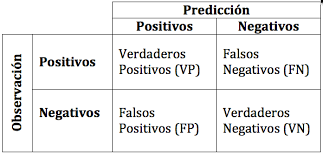

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [24]:
#Importar precision_score y recall_score 


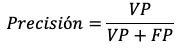

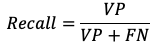

In [25]:
#Cambiar de clasificador
#Importar RandomForestClassifier

#Hacer la matriz de confusión otra vez


In [26]:
#Calcular la precisión y recall con el nuevo clasificador 


In [27]:
#Calcular F1


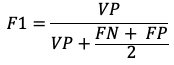

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [28]:
#Puntación de un paciente aleatorio


In [29]:
#Graficar la precisión y recall 

#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si


El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [30]:
#Supon que ya lo pensaste y querías un umbral  90 


In [31]:
#Arroja la precisión y recall para un umbral de 90


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [32]:
#Importar roc_curve


In [33]:
#Graficar la curva ROC

#Poner una cuadrícula


Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [34]:
#Calcular el puntaje de la curva


In [35]:
#Compararlo con el modelo de random forest


In [36]:
#Graficar la curva ROC y la predicción de random forest 


In [37]:
#Calcular el puntaje (área bajo la curva) de random forest  


***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [38]:
# Importar SVC=Support Vector Classifier



#Predecir a un humano aleatorio para ver que todo este funcionando bien 


In [39]:
#Utilizar decision_function para observar los puntajes de cada medicina 

#Decidirá por el qué tenga mayor puntaje

In [40]:
#Ahora, utiliza el clasificador multiclase 

#Predecir a un humano ahora con este clasificador


In [41]:
#Utilizar decision_function para observar los puntajes de cada medicina 


In [42]:
#campararlo con los datos obtenidos de sgd.fit 


***

## <span style="color:green">8. Analizar Errores</span>

In [43]:
#Hacer un clasificador de random forest


In [44]:
#Utilizar la matriz de confusión 


In [45]:
#utilizar ahora SGD
